## DATA HACKERMAN FINAL PROJECT

### Part 3 _Data Exploration_

let's find out what something interesting about the data. You are free to explore as you wish, producing plots, tables, statistics, etc. Feel free to use any variables in the dataset or include external data you may consider relevant to complement your analysis.  

In [1]:
import pandas as pd
import numpy as np
import folium
import json

import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()


import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from data_ingestion.ingest import get_data
from parameters.params import combined_data_file_path

### Load combined data from File Type Manipulation and Formatting task

In [2]:
data = get_data(combined_data_file_path)
data.head(3)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03


In [3]:
data.rename(columns = {'author.properties.friends': 'friends',
                        'author.properties.status_count': 'status_count',
                        'author.properties.verified': 'verified', 
                        'content.body': 'text', 
                        'location.country': 'country',
                        'properties.platform': 'platform', 
                        'properties.sentiment': 'sentiment', 
                        'location.latitude': 'latitude',
                        'location.longitude': 'longitude'},
                        inplace=True)

In [4]:
data.columns

Index(['friends', 'status_count', 'verified', 'text', 'country', 'platform',
       'sentiment', 'latitude', 'longitude'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   friends       3000 non-null   object 
 1   status_count  2999 non-null   float64
 2   verified      3000 non-null   object 
 3   text          2999 non-null   object 
 4   country       2999 non-null   object 
 5   platform      2998 non-null   object 
 6   sentiment     2999 non-null   float64
 7   latitude      2999 non-null   float64
 8   longitude     2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [6]:
data = data.dropna()

In [7]:
data['friends'] = data['friends'].astype('int64')
data['status_count'] = data['status_count'].astype('int64')
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data['sentiment'] = data['sentiment'].astype('int64')

In [8]:
data.describe()

,friends,status_count,sentiment,latitude,longitude
count,2998.00,2998.00,2998.00,2998.00,2998.00
mean,1320.24,35150.45,-0.26,52.75,-1.61
std,8247.54,129202.81,0.78,1.66,1.64
min,0.00,2.00,-1.00,49.19,-7.82
25%,260.25,3423.25,-1.00,51.50,-2.67
50%,526.00,11442.00,0.00,52.20,-1.40
75%,1081.75,30493.00,0.00,53.69,-0.18
max,333028.00,1702464.00,1.00,58.17,1.40


## Verified Distribution

In [9]:
data['verified'].value_counts()

False    2975
True       23
Name: verified, dtype: int64

## Country Distribution

In [10]:
data["country"].value_counts()

GB    2990
GG       5
JE       2
IM       1
Name: country, dtype: int64

## Platform Distribution

In [11]:
data["platform"].value_counts()

twitter    2998
Name: platform, dtype: int64

## Sentiment Count

In [12]:
data["sentiment"].value_counts()

-1    1403
 0     968
 1     627
Name: sentiment, dtype: int64

## Longitude and Latitude Plot

In [13]:
lat_long = []
for i, j in zip(data["latitude"][0:1000], data["longitude"][0:1000]):
    lat_long.append((i, j))

In [14]:
# Make an empty map
m = folium.Map(location=lat_long[0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
for i in range(0,len(data[0:100])):
    folium.Marker(
      location=[data.iloc[i]["latitude"], data.iloc[i]["longitude"]],
      popup=data.iloc[i]["country"],
   ).add_to(m)

# Show the map again
m

## Friends and Status Count Relationship

In [15]:
dff = data.copy()
dff['LogFriends'] = np.log(dff['friends'])
dff['LogStatus_count'] = np.log(dff['status_count'])

In [16]:
dff['LogFriends'].min(), dff['LogFriends'].max()

(-inf, 12.715981849511797)

In [17]:
dff['LogStatus_count'].min(), dff['LogStatus_count'].max()

(0.6931471805599453, 14.347587171407788)

<function matplotlib.pyplot.show(close=None, block=None)>

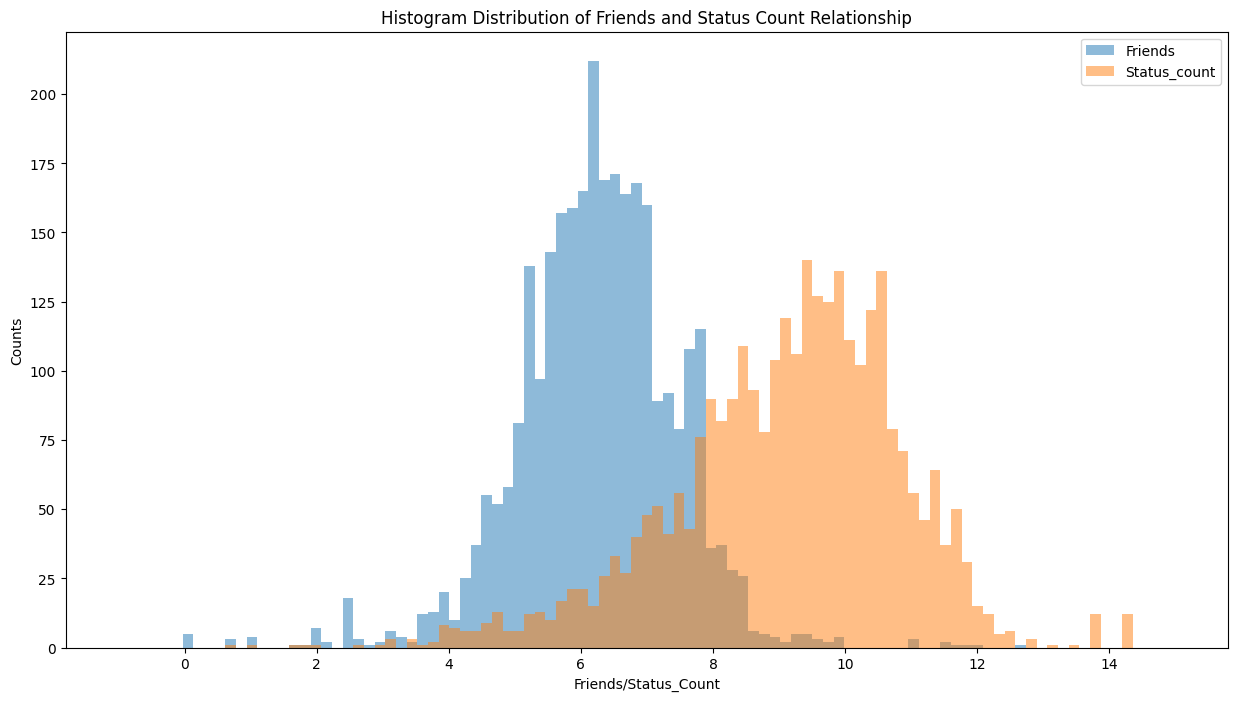

In [18]:
bins = np.linspace(-1, 15, 100)
dff['LogFriends'].hist(bins=bins, figsize=(15, 8), alpha=0.5, label="Friends")
dff['LogStatus_count'].hist(bins=bins, figsize=(15, 8), alpha=0.5, label='Status_count')
plt.legend()
plt.xlabel("Friends/Status_Count")
plt.ylabel('Counts')
plt.title("Histogram Distribution of Friends and Status Count Relationship")
plt.grid(None)
plt.show

The number of `Friends` and `Status` have almost identical distribution. We can check more for correlation using the method `.corr` 

In [19]:
data['friends'].corr(data['status_count'])

0.056588047297560735

The correlation is about 5.7%, not significant. 

Let's get the correlation between number of `friends`, `status counts` and `sentiments`. See below:

In [20]:
data['friends'].corr(data['sentiment'])

0.02434186729149764

In [21]:
data['status_count'].corr(data['sentiment'])

0.036514816844047185

In [22]:
data_coordinates = pd.DataFrame(data, columns = ["latitude", "longitude", "sentiment"])

In [23]:
data_coordinates.head()

,latitude,longitude,sentiment
0,51.57,0.46,1
1,52.97,-1.17,1
2,51.39,0.03,-1
3,51.65,-3.80,-1
4,53.54,-2.65,0


In [24]:
uk_map = folium.Map(location = [54.2361, 4.5481], zoom_start=6)
uk_map

In [25]:
def data_sentiment_coord(data_coordinates, sentiment_number):
    sentiment_coord = data_coordinates.loc[data_coordinates['sentiment'] == sentiment_number]
    sentiment_coord.reset_index(drop=True, inplace=True)
    
    return sentiment_coord

In [26]:
data_positive_coord = data_sentiment_coord(data_coordinates, 1)
data_negative_coord = data_sentiment_coord(data_coordinates, 0)
data_neutral_coord = data_sentiment_coord(data_coordinates, -1)

In [27]:
# Create a holding object for our map

def sentiment_points(sentiment_coord_data, color_str):
    tweetpoint = folium.map.FeatureGroup()
    for lat, lng, in zip(data_positive_coord['latitude'], data_positive_coord['longitude']):
        tweetpoint.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=0.2,
                color=color_str,
                fill=True,
                fill_color=color_str,
                fill_opacity=0.6
            )
        )

    return uk_map.add_child(tweetpoint)

In [28]:
sentiment_points(data_negative_coord, "red")

In [29]:
sentiment_points(data_positive_coord, "green")

In [30]:
sentiment_points(data_neutral_coord, "blue")

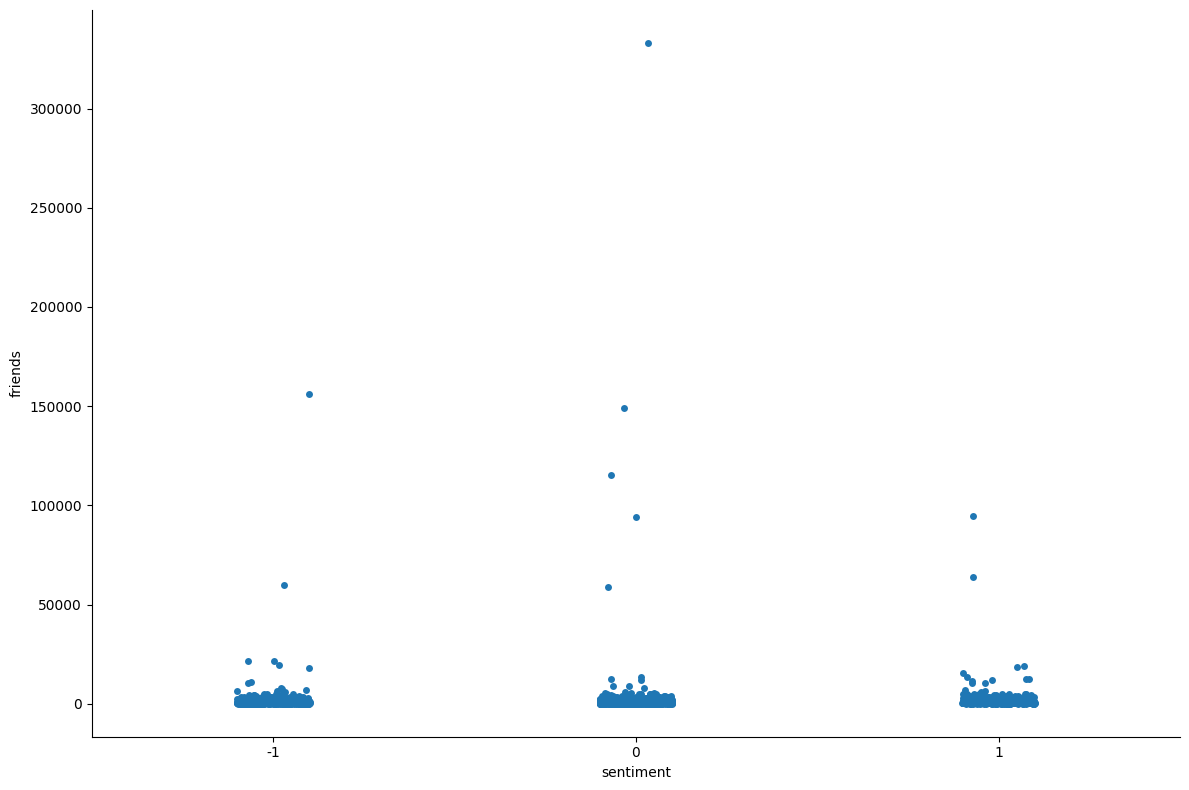

In [31]:
sns.catplot(x='sentiment', y='friends', data=data, height=8, aspect=12/8)

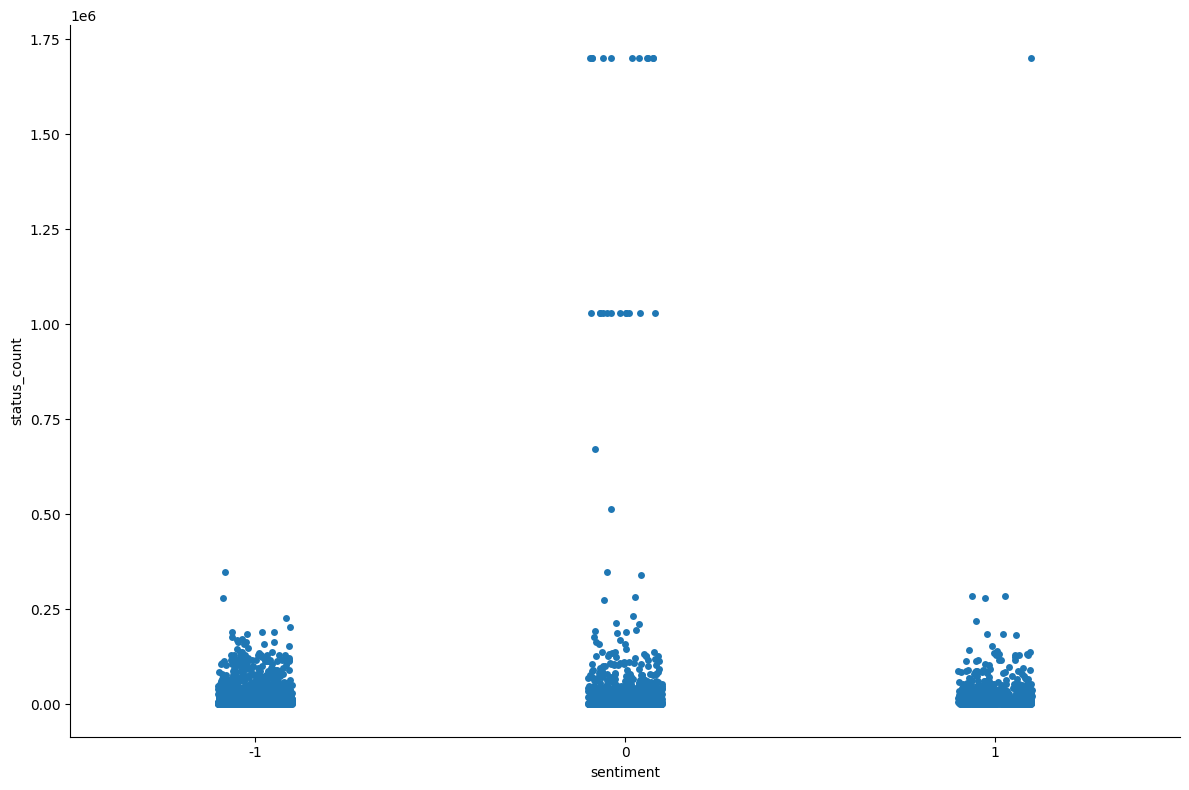

In [32]:
sns.catplot(x='sentiment', y='status_count', data=data, height=8, aspect=12/8)

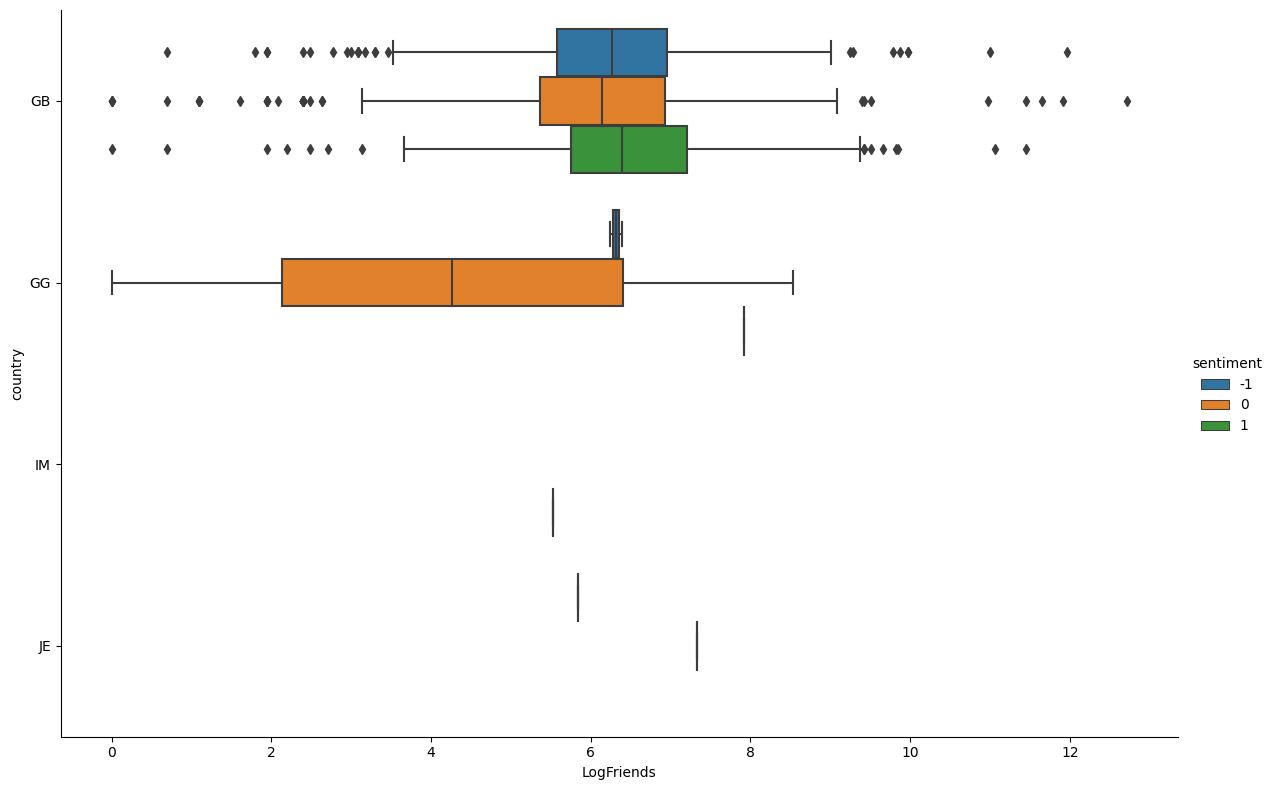

In [33]:
dd = data.copy()
dd['LogFriends'] = np.log(dd['friends'])
sns.catplot(x='LogFriends', y='country', kind="box", hue='sentiment', data=dd, height=8, aspect=12/8)

In [34]:
dfs = data.copy()

In [35]:
from wordcloud import WordCloud

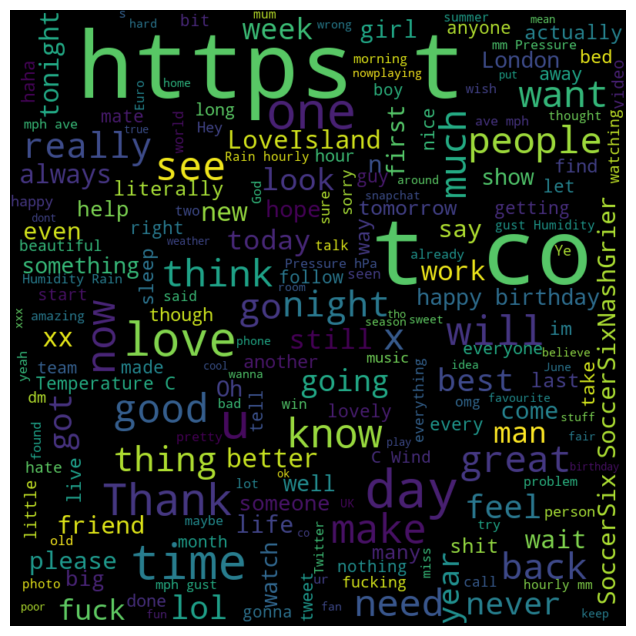

In [36]:
# The raw plot without any image mask
combined_text = ' '.join([x for x in dfs['text']])
wordcloud = WordCloud(width=800, height=800, random_state=42, max_font_size=120).generate(combined_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()